<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/Lab_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENTT-6: Object Detection and Segmentation using YOLOV8

## Name: SK SHAKEEL AKHTAR
## Reg. No.: 2341001063
## Section: 23412C3

# Task 1: Loading and Running YOLOv8 on an Image
* Install the ultralytics library
* Load the pre-trained YOLOv8 object detection model.
* Run inference on different images collected and display the results.
* Save the output images

# 1. Task 1: Loading and Running YOLOv8 on an Image
 * Install the ultralytics library
 *Load the pre-trained YOLOv8 object detection model.
 Run inference on different images collected and display the results.
 Save the output images

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
model =YOLO("yolov8m.pt")
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
from PIL import Image
import requests

image_paths = [
    'https://c4.wallpaperflare.com/wallpaper/144/375/674/nba-images-pictures-wallpaper-preview.jpg',
    #'https://images.stockcake.com/public/5/0/a/50a6e95f-83bb-41a2-b04e-8f6938a0dcb0_large/bustling-city-traffic-stockcake.jpg',
    'https://www.shutterstock.com/image-photo/collage-different-cute-pets-260nw-206750137.jpg',
    'https://thumbs.dreamstime.com/b/colorful-collage-flowers-birds-showcased-to-celebrate-international-day-biological-diversity-ai-generated-colorful-365354078.jpg',
]

results_list = []

for image_path in image_paths:
    try:
        img = Image.open(requests.get(image_path, stream=True).raw)
        results = model.predict(img, save=True, conf=0.2, iou=0.5)
        results_list.append(results)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")


0: 416x640 8 persons, 1 baseball glove, 1 skateboard, 765.7ms
Speed: 2.2ms preprocess, 765.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2

0: 640x608 10 cats, 10 dogs, 1209.9ms
Speed: 2.1ms preprocess, 1209.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict2

0: 320x640 4 birds, 879.3ms
Speed: 2.1ms preprocess, 879.3ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict2


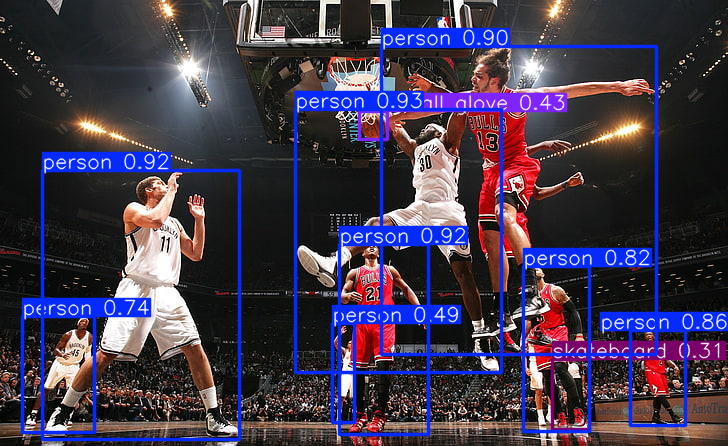

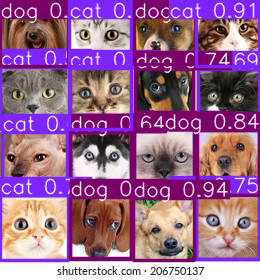

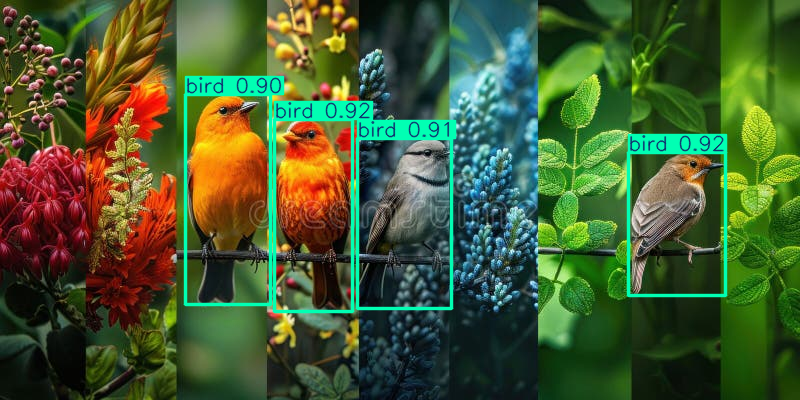

In [ ]:
import cv2
for results in results_list:     # Iterate through results for each image
          for result in results:          # Iterate through detections within each image's results
                    # Plot the detections for the current result (image)
                    plot = result.plot()

                    # Convert the plot to RGB color space
                    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

                    # Display the image with detections
                    display(Image.fromarray(plot))


#  Task 2: Instance Segmentation using YOLOv8 on an Image
* Load the pre-trained YOLOv8 segmentation model.
* Perform instance segmentation on different images collected and display the results.
* Display and save the segmented image.

In [ ]:
from ultralytics import YOLO, hub

# Load a pretrained model from the Ultralytics hub
segmentation_model = YOLO("yolov8m-seg")

# Now you can use the model
segmentation_model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou


0: 416x640 8 persons, 989.4ms
Speed: 1.6ms preprocess, 989.4ms inference, 21.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/segment/predict2

0: 640x608 9 cats, 11 dogs, 1432.9ms
Speed: 2.6ms preprocess, 1432.9ms inference, 101.2ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/segment/predict2

0: 320x640 4 birds, 1 potted plant, 672.3ms
Speed: 1.3ms preprocess, 672.3ms inference, 7.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/segment/predict2


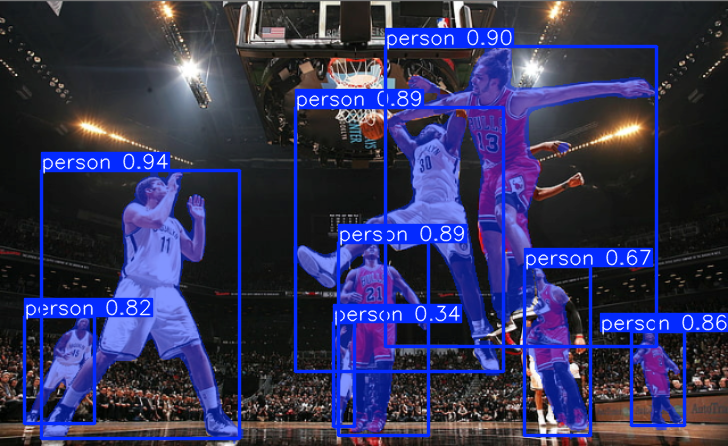

Saved segmented image to segmented_image_2.jpg


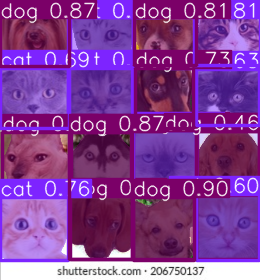

Saved segmented image to segmented_image_2.jpg


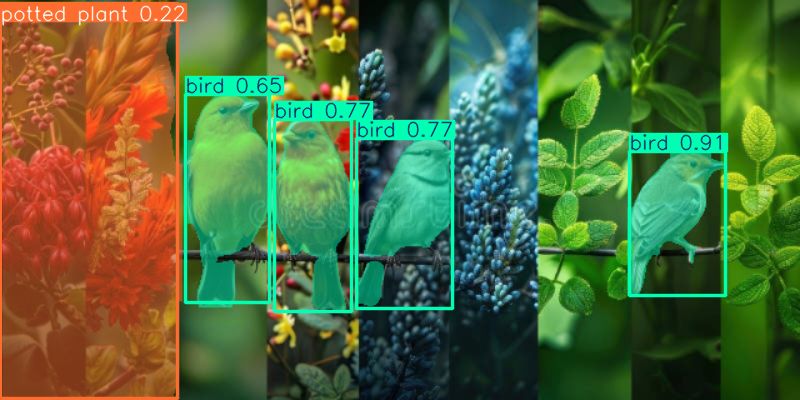

Saved segmented image to segmented_image_2.jpg


In [ ]:
# prompt:  Perform instance segmentation on different images collected and display the results.
#  Display and save the segmented imag

from ultralytics import YOLO
from PIL import Image
import requests
import cv2
from IPython.display import display

# Assuming you have already installed ultralytics and other required packages


image_paths = [
    'https://c4.wallpaperflare.com/wallpaper/144/375/674/nba-images-pictures-wallpaper-preview.jpg',
    #'https://images.stockcake.com/public/5/0/a/50a6e95f-83bb-41a2-b04e-8f6938a0dcb0_large/bustling-city-traffic-stockcake.jpg',
    'https://www.shutterstock.com/image-photo/collage-different-cute-pets-260nw-206750137.jpg',
    'https://thumbs.dreamstime.com/b/colorful-collage-flowers-birds-showcased-to-celebrate-international-day-biological-diversity-ai-generated-colorful-365354078.jpg',
]
results_list = []

for image_path in image_paths:
    try:
        img = Image.open(requests.get(image_path, stream=True).raw)
        results = segmentation_model.predict(img, save=True, conf=0.2, iou=0.5, imgsz=640) # Added imgsz for better performance
        results_list.append(results)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for results in results_list:
    for result in results:
        plotted_img = result.plot()
        plotted_img = cv2.cvtColor(plotted_img, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(plotted_img))

        # Save the segmented image
        segmented_image_path = f"segmented_image_{image_paths.index(image_path)}.jpg" # Unique file name
        cv2.imwrite(segmented_image_path, cv2.cvtColor(plotted_img, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving
        print(f"Saved segmented image to {segmented_image_path}")
